In [691]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [692]:
df=pd.read_csv("Corpus_to_test.csv",encoding='latin-1')
df.head()

,S.No,Question,Category,Answers
0,1,I am unable to connect to admission department.,Admission,You can write to admissions@reva.edu.in. One o...
1,2,What are the UG courses offered?,Admission,"Computer Applications, Arts and Humanity, Law..."
2,3,What are the Computer Applications courses off...,Admission,Bachelor of Computer Applications (BCA)
3,4,What are the Arts and Humanity courses offered...,Admission,"1.\tBA in Political Science, Economics and Jou..."
4,5,What are the Law courses offered in UG,Admission,1.\tBachelor of Arts and Bachelor of Laws (B.A...


# Dataset exploration

In [693]:
df.isnull().sum()

S.No        0
Question    0
Category    0
Answers     0
dtype: int64

In [694]:
df.isna().sum()

S.No        0
Question    0
Category    0
Answers     0
dtype: int64

In [695]:
#df = df.dropna(how='any',axis=0) 

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 4 columns):
S.No        639 non-null int64
Question    639 non-null object
Category    639 non-null object
Answers     639 non-null object
dtypes: int64(1), object(3)
memory usage: 20.0+ KB


In [697]:
df['Category'].value_counts()

Admission                         148
Academics                          74
RACE                               72
Hostel                             52
UG Courses                         51
HR                                 50
ERP Support                        34
PG Courses                         33
Examination                        26
Greetings                          24
About REVA                         22
Finance                            20
Certificate/Diploma/PG Diploma     18
Ph.D.                              15
Name: Category, dtype: int64

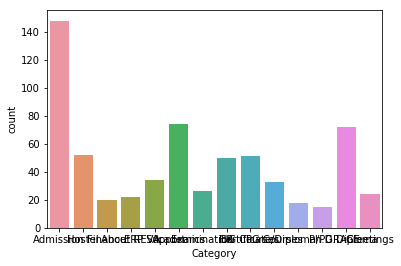

In [698]:
sns.countplot(x='Category', data=df)

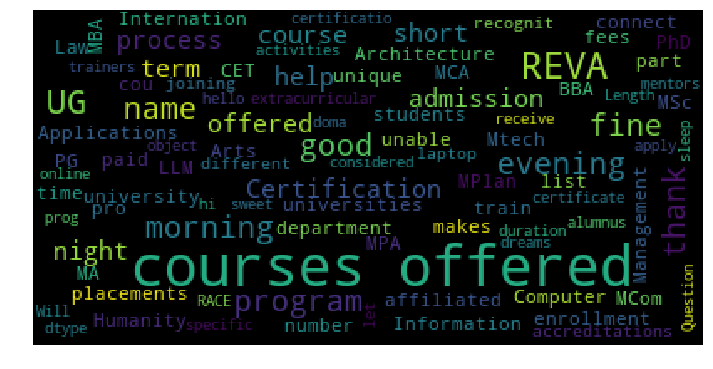

In [699]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['Question'])

In [700]:
##### List of Questions to list of words for better visualization
word_list=[]
list_question=list(df["Question"])
for sentence in list_question:
    words_sentence=sentence.split()
    for words in words_sentence:
        word_list.append(words)


word_list=[word for sentence in list(df["Question"]) for word in sentence.split()]
print(word_list)

['I', 'am', 'unable', 'to', 'connect', 'to', 'admission', 'department.', 'What', 'are', 'the', 'UG', 'courses', 'offered?', 'What', 'are', 'the', 'Computer', 'Applications', 'courses', 'offered', 'in', 'UG?', 'What', 'are', 'the', 'Arts', 'and', 'Humanity', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Law', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Architecture', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Certification', 'program', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Management', '(BBA)', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'PG', 'courses', 'offered?', 'What', 'are', 'the', 'Mtech', 'courses', 'offered?', 'What', 'are', 'the', 'MA', 'courses', 'offered?', 'What', 'are', 'the', 'MSc', 'courses', 'offered?', 'What', 'are', 'the', 'MPlan', 'courses', 'offered?', 'What', 'are', 'the', 'MCom', 'courses', 'offered?', 'What', 'are', 'the', 'MPA', 'courses', 'offered?', 'What', 'are', 'the', 'MCA', 'courses', 'offered?', 'W

In [701]:
from collections import Counter
#####  frequency of each word and the most common words in the dataset
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'the': 251, 'you': 166, 'Do': 162, 'What': 143, 'offer': 123, 'is': 117, 'for': 110, 'I': 109, 'in': 99, 'to': 96, 'are': 72, 'How': 71, 'IN': 66, 'of': 62, 'REVA': 62, 'a': 55, 'Is': 52, 'have': 49, 'AND': 40, '-': 40, 'and': 39, 'do': 39, 'my': 37, 'any': 36, 'can': 34, 'there': 27, 'University?': 26, 'courses': 23, 'Can': 23, 'get': 21, 'program?': 20, 'if': 20, 'not': 20, 'at': 19, 'University': 19, 'campus?': 19, 'When': 19, 'many': 19, 'Does': 18, 'ENGINEERING?': 17, 'apply': 16, 'pay': 16, 'program': 15, 'be': 15, 'application': 15, 'programs?': 15, 'PH.D': 15, 'offered?': 14, 'offered': 14, 'fees': 14, 'from': 14, 'or': 14, 'B.TECH.': 14, 'COMPUTER': 14, 'programs': 13, 'it': 13, 'student': 13, 'hostel': 13, 'am': 12, 'Are': 12, 'Why': 12, 'HONS': 12, 'B.SC.': 12, 'M.TECH.': 12, 'DIPLOMA': 12, 'students': 11, 'on': 11, 'REVA?': 11, 'will': 11, 'admission?': 11, 'we': 11, 'M.': 11, 'university': 10, 'book': 10, 'ERP': 10, 'academic': 9, 'fee': 9, 'how': 9, 'Whom': 9, 'M

# feature extraction

In [702]:
#feature extraction
y=df['Category'].values
y.shape

(639,)

In [703]:
x=df['Question'].values
x.shape

(639,)

In [704]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Question"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
['100', '16', '404', 'abled', 'about', 'abroad', 'academic', 'accepting', 'access', 'accommodation', 'account', 'accounting', 'accreditations', 'accredited', 'action', 'activities', 'administration', 'admission', 'admissions', 'affiliated', 'after', 'against', 'ai', 'aicte', 'aided', 'air', 'airport', 'all', 'allow', 'allowed', 'along', 'alumni', 'alumnus', 'am', 'amount', 'an', 'analytics', 'and', 'android', 'animation', 'announced', 'another', 'answer', 'anti', 'any', 'app', 'applicant', 'application', 'applications', 'applied', 'apply', 'applying', 'approach', 'approval', 'approved', 'arch', 'architecture', 'are', 'around', 'arranged', 'arrangement', 'arrangements', 'artificial', 'arts', 'as', 'assessment', 'assigned', 'assignment', 'assignments', 'assistance', 'assisted', 'at', 'atithi', 'attend', 'attendance', 'attending', 'automation', 'autonomous', 'avail', 'av

In [705]:
#Train-test split:
from sklearn.model_selection import train_test_split

In [706]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(256,)

In [707]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'Question'})

In [708]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'Category'})
df_train=pd.concat([df1,df2],axis=1)

In [709]:
df_train.head()

,Question,Category
0,What is the strength of each class?,Admission
1,Are there any cybersecurity courses offered on...,RACE
2,"Do you offer B.SC. IN PHYSICS, MATHS, COMPUTER...",UG Courses
3,Do you offer M.TECH. - POWER ENERGY SYSTEMS (PS)?,PG Courses
4,Is industry experience mandatory for joining A...,RACE


In [710]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'Question'})

In [711]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'Category'})
df_test=pd.concat([df3,df4],axis=1)

In [712]:
df_test.head()

,Question,Category
0,Why is my attendance not displayed of the curr...,Admission
1,Do you have any specific training given for pl...,RACE
2,What assessment pattern is followed at REVA Un...,UG Courses
3,What is the process to apply for Provisional D...,PG Courses
4,Do you offer MPA - KATHAK?,RACE


# Basic pre-processing of train and test data

In [713]:
### Remove Punctuations and change all words to lower case
import re
import string
def remove_punctuations(text):
    words=[word.lower() for word in text.split()] 
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

df["que_no_punct"]=df["Question"].apply(remove_punctuations)
#print (df["que_no_punct"])

In [714]:
#storing the puntuation free text in a new column called clean_msg
df_train['Questions']= df["Question"].apply(lambda x:remove_punctuations(x))
df_test['Questions']= df["Question"].apply(lambda x:remove_punctuations(x))

In [715]:
#punctuations are removed from news column in train dataset
df_train.head()

,Question,Category,Questions
0,What is the strength of each class?,Admission,I am unable to connect to admission department
1,Are there any cybersecurity courses offered on...,RACE,What are the UG courses offered
2,"Do you offer B.SC. IN PHYSICS, MATHS, COMPUTER...",UG Courses,What are the Computer Applications courses off...
3,Do you offer M.TECH. - POWER ENERGY SYSTEMS (PS)?,PG Courses,What are the Arts and Humanity courses offered...
4,Is industry experience mandatory for joining A...,RACE,What are the Law courses offered in UG


In [716]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinayajx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [717]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinayajx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Code to generate n-grams

In [833]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
    #words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
    #words = word_tokenize(text)
    stop_words = stopwords.words('english')
    sw_list = ['REVA','University', 'I', 'What', 'How', 'Is', 'Does', 'Will', 'Where','get','fill', 'will','included','university', 'unable', 'can', 'many', 'When', 'Can', 'still', 'Why', 'Do', '']
    stop_words .extend(sw_list)
    words=[word for word in text.split(" ") if word not in stop_words]
    print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

Creating unigrams:

In [834]:
from collections import defaultdict

In [835]:
AcademicsValues=defaultdict(int)
AdmissionValues=defaultdict(int)
RACEValues=defaultdict(int)
HostelValues=defaultdict(int)
ERPSupportValues=defaultdict(int)
HRValues=defaultdict(int)
AboutREVAValues=defaultdict(int)

In [836]:
##get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where category is "Academics"
for text in df_train[df_train.Category=="Hostel"].Questions:
    for word in generate_N_grams(text):
        HostelValues[word]+=1

Sentence after removing stopwords: ['Admission', 'process', 'CET', 'list', 'programs', 'accepting', 'CET']
Sentence after removing stopwords: ['accreditations', 'recognitions', 'Universities']
Sentence after removing stopwords: ['big', 'campus']
Sentence after removing stopwords: ['far', 'airport', 'campus']
Sentence after removing stopwords: ['procedure', 'avail', 'transport', 'facility']
Sentence after removing stopwords: ['syllabus']
Sentence after removing stopwords: ['Engineering', 'course', 'commence']
Sentence after removing stopwords: ['security', 'arrangement', 'campus']
Sentence after removing stopwords: ['Are', 'student', 'exchange', 'programs']
Sentence after removing stopwords: ['average', 'highest', 'package']
Sentence after removing stopwords: ['engineering', 'taken', 'Mathematics', 'PUC']
Sentence after removing stopwords: ['cutoff', 'PGCET', 'COMEDK']
Sentence after removing stopwords: ['charge', 'donation']
Sentence after removing stopwords: ['facilities', 'available'

In [837]:
#get the count of every word in both the columns of df_train and df_test dataframes where category = 'Admission'
for text in df_train[df_train.Category=="Admission"].Questions:
    for word in generate_N_grams(text):
        AdmissionValues[word]+=1

Sentence after removing stopwords: ['connect', 'admission', 'department']
Sentence after removing stopwords: ['MSc', 'courses', 'offered']
Sentence after removing stopwords: ['MCA', 'courses', 'offered']
Sentence after removing stopwords: ['train', 'students', 'placements']
Sentence after removing stopwords: ['hostel']
Sentence after removing stopwords: ['Reva', '100', 'placements']
Sentence after removing stopwords: ['far', 'city']
Sentence after removing stopwords: ['transport', 'available']
Sentence after removing stopwords: ['Events', 'hosted']
Sentence after removing stopwords: ['Virtual', 'Campus', 'Tour']
Sentence after removing stopwords: ['application', 'timeline', 'admissions']
Sentence after removing stopwords: ['CET', 'code']
Sentence after removing stopwords: ['COMEDK', 'code']
Sentence after removing stopwords: ['Are', 'medical', 'services', 'campus']
Sentence after removing stopwords: ['provision', 'admission', 'Defense', 'Quota']
Sentence after removing stopwords: ['con

In [838]:
#get the count of every word in both the columns of df_train and df_test dataframes where category = 'Admission'
for text in df_train[df_train.Category=="RACE"].Questions:
    for word in generate_N_grams(text):
        RACEValues[word]+=1

Sentence after removing stopwords: ['UG', 'courses', 'offered']
Sentence after removing stopwords: ['Law', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Architecture', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Certification', 'program', 'offered', 'UG']
Sentence after removing stopwords: ['MPlan', 'courses', 'offered']
Sentence after removing stopwords: ['MCom', 'courses', 'offered']
Sentence after removing stopwords: ['part', 'time', 'courses', 'offered']
Sentence after removing stopwords: ['Scholarships', 'offered', 'deserving', 'students']
Sentence after removing stopwords: ['Education', 'loans', 'offered', 'students']
Sentence after removing stopwords: ['offer', 'sports', 'quota']
Sentence after removing stopwords: ['Holidays']
Sentence after removing stopwords: ['eligibility', 'criteria', 'taking', 'admission', 'engineering', 'programs']
Sentence after removing stopwords: ['CET']
Sentence after removing stopwords: ['ranking']
Sentence afte

In [839]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_Hostel=pd.DataFrame(sorted(HostelValues.items(),key=lambda x:x[1],reverse=True))
df_Admission=pd.DataFrame(sorted(AdmissionValues.items(),key=lambda x:x[1],reverse=True))
df_RACE=pd.DataFrame(sorted(RACEValues.items(),key=lambda x:x[1],reverse=True))

In [840]:
pd1=df_Hostel[0][:10]
pd2=df_Hostel[1][:10]

In [841]:
Adm1=df_Admission[0][:10]
Adm2=df_Admission[1][:10]

In [842]:
race1=df_RACE[0][:10]
race2=df_RACE[1][:10]

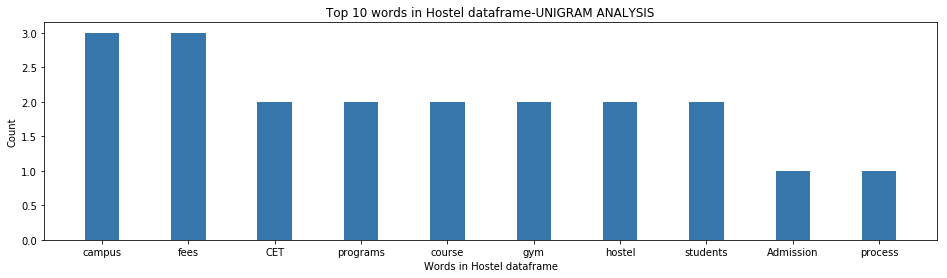

In [843]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in Hostel dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Hostel dataframe-UNIGRAM ANALYSIS")
plt.savefig("Hostel-unigram.png")
plt.show()

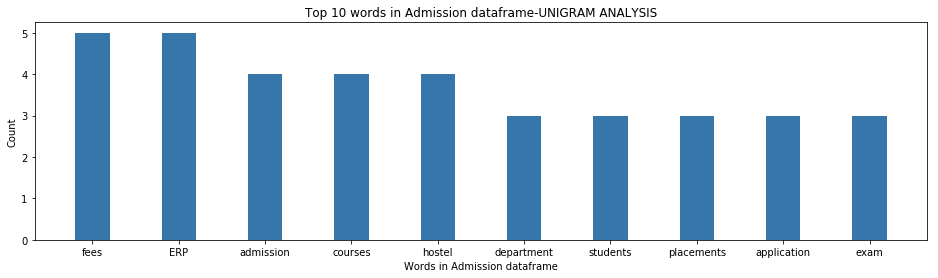

In [844]:
plt.figure(1,figsize=(16,4))
plt.bar(Adm1,Adm2, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in Admission dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Admission dataframe-UNIGRAM ANALYSIS")
plt.savefig("Admission-unigram.png")
plt.show()

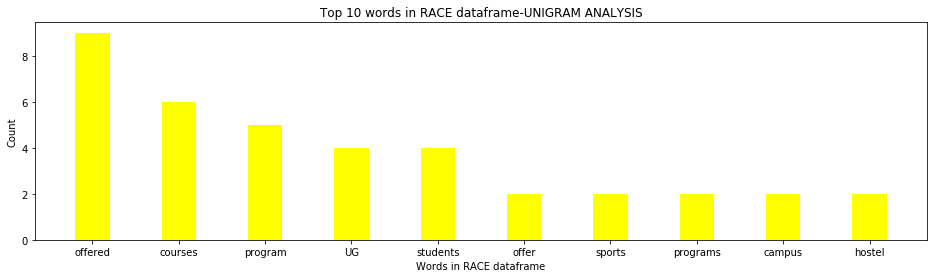

In [845]:
plt.figure(1,figsize=(16,4))
plt.bar(race1,race2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in RACE dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in RACE dataframe-UNIGRAM ANALYSIS")
plt.savefig("RACE -unigram.png")
plt.show()

Creating bigrams:

In [846]:
HostelValues2=defaultdict(int)
AdmissionValues2=defaultdict(int)
RACEValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [847]:
#get the count of every word in both the columns of df_train and df_test dataframes where Category  is Admission"
for text in df_train[df_train.Category=="Admission"].Questions:
    for word in generate_N_grams(text,2):
        AdmissionValues2[word]+=1

Sentence after removing stopwords: ['connect', 'admission', 'department']
Sentence after removing stopwords: ['MSc', 'courses', 'offered']
Sentence after removing stopwords: ['MCA', 'courses', 'offered']
Sentence after removing stopwords: ['train', 'students', 'placements']
Sentence after removing stopwords: ['hostel']
Sentence after removing stopwords: ['Reva', '100', 'placements']
Sentence after removing stopwords: ['far', 'city']
Sentence after removing stopwords: ['transport', 'available']
Sentence after removing stopwords: ['Events', 'hosted']
Sentence after removing stopwords: ['Virtual', 'Campus', 'Tour']
Sentence after removing stopwords: ['application', 'timeline', 'admissions']
Sentence after removing stopwords: ['CET', 'code']
Sentence after removing stopwords: ['COMEDK', 'code']
Sentence after removing stopwords: ['Are', 'medical', 'services', 'campus']
Sentence after removing stopwords: ['provision', 'admission', 'Defense', 'Quota']
Sentence after removing stopwords: ['con

In [848]:
#get the count of every word in both the columns of df_train and df_test dataframes where Category  is Academics"
for text in df_train[df_train.Category=="Hostel"].Questions:
    for word in generate_N_grams(text,2):
        HostelValues2[word]+=1

Sentence after removing stopwords: ['Admission', 'process', 'CET', 'list', 'programs', 'accepting', 'CET']
Sentence after removing stopwords: ['accreditations', 'recognitions', 'Universities']
Sentence after removing stopwords: ['big', 'campus']
Sentence after removing stopwords: ['far', 'airport', 'campus']
Sentence after removing stopwords: ['procedure', 'avail', 'transport', 'facility']
Sentence after removing stopwords: ['syllabus']
Sentence after removing stopwords: ['Engineering', 'course', 'commence']
Sentence after removing stopwords: ['security', 'arrangement', 'campus']
Sentence after removing stopwords: ['Are', 'student', 'exchange', 'programs']
Sentence after removing stopwords: ['average', 'highest', 'package']
Sentence after removing stopwords: ['engineering', 'taken', 'Mathematics', 'PUC']
Sentence after removing stopwords: ['cutoff', 'PGCET', 'COMEDK']
Sentence after removing stopwords: ['charge', 'donation']
Sentence after removing stopwords: ['facilities', 'available'

In [849]:
#get the count of every word in both the columns of df_train and df_test dataframes where Category  is RACE"
for text in df_train[df_train.Category=="RACE"].Questions:
    for word in generate_N_grams(text,2):
        RACEValues2[word]+=1

Sentence after removing stopwords: ['UG', 'courses', 'offered']
Sentence after removing stopwords: ['Law', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Architecture', 'courses', 'offered', 'UG']
Sentence after removing stopwords: ['Certification', 'program', 'offered', 'UG']
Sentence after removing stopwords: ['MPlan', 'courses', 'offered']
Sentence after removing stopwords: ['MCom', 'courses', 'offered']
Sentence after removing stopwords: ['part', 'time', 'courses', 'offered']
Sentence after removing stopwords: ['Scholarships', 'offered', 'deserving', 'students']
Sentence after removing stopwords: ['Education', 'loans', 'offered', 'students']
Sentence after removing stopwords: ['offer', 'sports', 'quota']
Sentence after removing stopwords: ['Holidays']
Sentence after removing stopwords: ['eligibility', 'criteria', 'taking', 'admission', 'engineering', 'programs']
Sentence after removing stopwords: ['CET']
Sentence after removing stopwords: ['ranking']
Sentence afte

In [850]:
#focus on more frequently occuring words for every Category=>
#sort in DO wrt 2nd column in each of AdmissionValues,AcademicsValues and RACEValues
df_Hostel2=pd.DataFrame(sorted(HostelValues2.items(),key=lambda x:x[1],reverse=True))
df_Admission2=pd.DataFrame(sorted(AdmissionValues2.items(),key=lambda x:x[1],reverse=True))
df_RACE2=pd.DataFrame(sorted(RACEValues2.items(),key=lambda x:x[1],reverse=True))

In [851]:
pd1bi=df_Hostel2[0][:10]
pd2bi=df_Hostel2[1][:10]

In [852]:
ned1bi=df_Admission2[0][:10]
ned2bi=df_Admission2[1][:10]

In [853]:
nud1bi=df_RACE2[0][:10]
nud2bi=df_RACE2[1][:10]

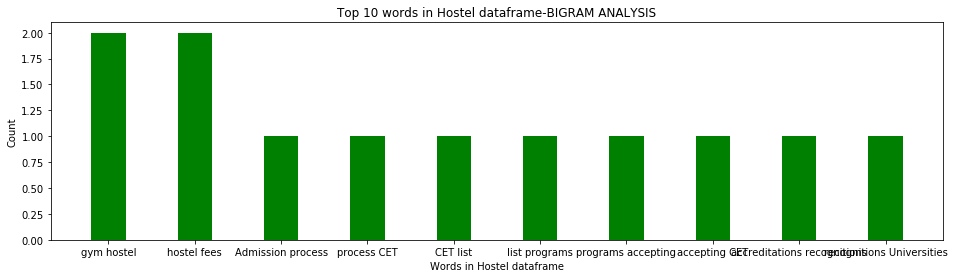

In [854]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in Hostel dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Hostel dataframe-BIGRAM ANALYSIS")
plt.savefig("Hostel-bigram.png")
plt.show()

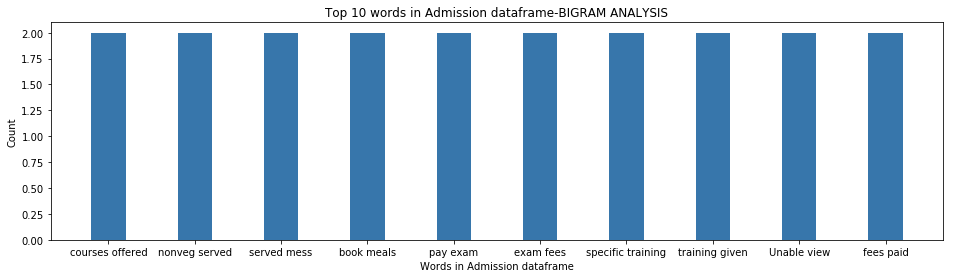

In [855]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='#3776ab',
        width = 0.4)
plt.xlabel("Words in Admission dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Admission dataframe-BIGRAM ANALYSIS")
plt.savefig("Admission-bigram.png")
plt.show()

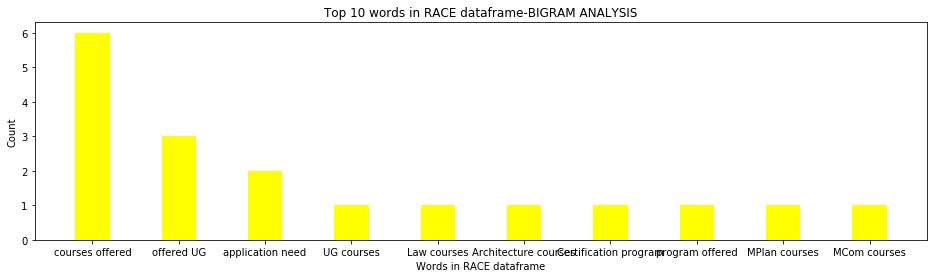

In [856]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in RACE dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in RACE dataframe-BIGRAM ANALYSIS")
plt.savefig("RACE-bigram.png")
plt.show()

In [857]:
# import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# encode target label
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# establish input and output
X = list(df['Question'])
y = list(df['Category'])

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [858]:
#Question will be converted to a bag of words with the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create a bag of words for only unigrams
cv = CountVectorizer(analyzer = 'word',ngram_range=(1,1), stop_words='english')

# convert training data to bag of words
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [859]:
# import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import numpy as np

# train model with different n-gram ranges
for N in range(1,11):
    
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.5625
F-1 score of model with n-gram range of (1, 2): 0.5375
F-1 score of model with n-gram range of (1, 3): 0.5312
F-1 score of model with n-gram range of (1, 4): 0.5312
F-1 score of model with n-gram range of (1, 5): 0.5312
F-1 score of model with n-gram range of (1, 6): 0.5312
F-1 score of model with n-gram range of (1, 7): 0.5312
F-1 score of model with n-gram range of (1, 8): 0.5312
F-1 score of model with n-gram range of (1, 9): 0.5312
F-1 score of model with n-gram range of (1, 10): 0.5312


Based on the results, the model performs at its best with the n-gram range of (1,1).

In [677]:
import pandas as pd
from collections import defaultdict
import numpy as np
def explode_str(df, col, sep):
    s = df[col]
    i = np.arange(len(s)).repeat(s.str.count(sep) + 1)
    return df.iloc[i].assign(**{col: sep.join(s).split(sep)})

In [678]:
# queries.csv contains your search term report with KPIs
# Adjust delimiter by seeting the sep= parameter
print("----------------------------------------------------------------------------------------------------")
print("\tThe raw report")
print("----------------------------------------------------------------------------------------------------")
df = pd.read_csv("Corpus_to_test.csv",encoding='latin-1')
print(df)

----------------------------------------------------------------------------------------------------
	The raw report
----------------------------------------------------------------------------------------------------
     S.No                                           Question   Category  \
0       1    I am unable to connect to admission department.  Admission   
1       2                   What are the UG courses offered?  Admission   
2       3  What are the Computer Applications courses off...  Admission   
3       4  What are the Arts and Humanity courses offered...  Admission   
4       5             What are the Law courses offered in UG  Admission   
5       6    What are the Architecture courses offered in UG  Admission   
6       7   What are the Certification program offered in UG  Admission   
7       8  What are the Management (BBA) courses offered ...  Admission   
8       9                   What are the PG courses offered?  Admission   
9      10                What ar

In [679]:
# Create 1-Grams by splitting 1 row to multiple rows
# "Query" is the columnname where you want to apply the n-Gram analysis
df = explode_str(df, 'Question', ' ')
print("")
print("----------------------------------------------------------------------------------------------------")
print("\tSplitting into 1-Grams")
print("----------------------------------------------------------------------------------------------------")
print(df)


----------------------------------------------------------------------------------------------------
	Splitting into 1-Grams
----------------------------------------------------------------------------------------------------
     S.No      Question   Category  \
0       1             I  Admission   
0       1            am  Admission   
0       1        unable  Admission   
0       1            to  Admission   
0       1       connect  Admission   
0       1            to  Admission   
0       1     admission  Admission   
0       1   department.  Admission   
1       2          What  Admission   
1       2           are  Admission   
1       2           the  Admission   
1       2            UG  Admission   
1       2       courses  Admission   
1       2      offered?  Admission   
2       3          What  Admission   
2       3           are  Admission   
2       3           the  Admission   
2       3      Computer  Admission   
2       3  Applications  Admission   
2       3    

In [680]:

# Group by N-Grams
df = df.groupby('Question').sum()
df = df.reset_index()
print("")
print("----------------------------------------------------------------------------------------------------")
print("\tAggregated Metrics on 1-Grams")
print("----------------------------------------------------------------------------------------------------")
print(df)




----------------------------------------------------------------------------------------------------
	Aggregated Metrics on 1-Grams
----------------------------------------------------------------------------------------------------
              Question   S.No
0                       18604
1               \tWhat     73
2                    &    791
3                    (    497
4          (ACCOUNTING    905
5             (BANKING    898
6                (BBA)      8
7            (BUSINESS    943
8              (CASE)?    482
9               (CTM)?    483
10              (CYBER    458
11              (DCN)?    489
12          (ECONOMICS    455
13          (ENGLISH)?    475
14               (FULL    965
15             (HEALTH    446
16           (HONOURS)    457
17          (HONOURS)?    939
18           (INDUSTRY    894
19        (MARKETING)?    447
20               (MD)?    487
21         (MULTIMEDIA    459
22                (NEW    450
23               (PART    486
24              